In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Name: Parthav Joshi
## Roll No: C045

In [46]:
train = pd.read_csv('heart_fail_data.csv')
display(train.head(3))
print(train.shape)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


(306, 13)


In [47]:
X = train.iloc[:, :-1] # input feature
y = train.iloc[:,-1] # output features
display(X)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
301,65.0,0,94,1,50,1,188000.00,1.0,140,1,0,29
302,69.0,0,582,1,35,0,228000.00,3.5,134,1,0,30
303,90.0,1,60,1,50,0,226000.00,1.0,134,1,0,30
304,82.0,1,855,1,50,1,321000.00,1.0,145,0,0,30


In [48]:
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    1
305    0
Name: DEATH_EVENT, Length: 306, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [54]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

<ipython-input-54-90cbc6b20720>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = scaler.fit_transform(X_train[cols])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-54-90cbc6b20720>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
preds = model.predict(X_test)
preds

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [15]:
print(confusion_matrix(y_test, preds))

[[40  7]
 [ 3 12]]


In [16]:
print(roc_auc_score(y_test, preds))

0.825531914893617


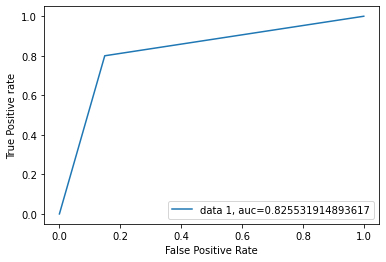

In [27]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
y_true = y_test
y_probas = preds
plt.show()